# Building and deploying a Web Application dashboard to a cloud service.

**Objectives:**

The primary objective of this project is to build and deploy a web application dashboard to a cloud service.

To do this, we will: 
- Explore the data
- Creating and manage python virtual environments
- Develop a Web application using the streamlit framework.
- Deploy the web application to a cloud service using thr Render platform that will make it accessible to the public.


### General data information

In [1]:
#Importing the required libraries
import pandas as pd
import plotly.express as px
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


Loading the data

In [2]:
df = pd.read_csv('vehicles_us.csv')
print('Data has been read correctly!')

Data has been read correctly!


Previewing the data

In [3]:
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

We can see that the manufacturer's name is together with the model. We will create a new column with the manufacturer's name

In [4]:
#Create a new column call `manufacturer`
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

In [5]:
#Taking a look
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     NaN  2019-02-07           79   
3    automatic  pickup         NaN     NaN  2019-03-22            9   
4    automatic   sedan       black     NaN  2019-04-02           28   

  manufacturer  
0          bmw  
1         ford  
2      hyundai  
3         ford  
4     chrysler

In [6]:
#Create a new column called state which contains new and preowned vehicles 
def determine_state(row):
    if row['odometer'] == 0:
        return 'new'
    else:
        return 'preowned'

df['state'] = df.apply(determine_state, axis=1)
print('A new column called state has been created')

A new column called state has been created


In [7]:
#Taking a look 
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     NaN  2019-02-07           79   
3    automatic  pickup         NaN     NaN  2019-03-22            9   
4    automatic   sedan       black     NaN  2019-04-02           28   

  manufacturer     state  
0          bmw  preowned  
1         ford  preowned  
2      hyundai  preowned  
3         ford  preowned  
4     chrysler  preowned

In [8]:
# Check the datatype with info() method
print('The structure of our data is:')
df.info()
print()

# check the structure of our dataset
print('The shape of our data is', df.shape, 'with {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The structure of our data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  manufacturer  51525 non-null  object 
 14  state         51525 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.9+ MB

The shape of our data is (51525, 15) with 51525 rows and 15 columns

No missing values in the dataframe

From the general information about the dataset, we can see that model_year, cylinders, odometer, paint_color and is_4wd all have some missing data. Some columns like `model_year`, `cylinders`, `odometer`, `is_4wd` are all float data type, we will convert them to integer later on.

In [9]:
#Check for duplicates
duplicates = df.duplicated().sum()
print(f'The number of duplicates is {duplicates}')


The number of duplicates is 0


In [10]:
#number of missing values
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
manufacturer        0
state               0
dtype: int64

There are missng values in the `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` columns.

In [11]:
# function to calculate the percentage of missing values
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        if mis_val_table_ren_columns.empty:
            print("We no longer have any missing values in the dataframe.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
#Proportion of missing values
missing_values(df)

Missing Values  % of Total Values
is_4wd                25953               50.4
paint_color            9267               18.0
odometer               7892               15.3
cylinders              5260               10.2
model_year             3619                7.0

From the table, we can see that the column `is_4wd` has 50% of its values missing. We will fill the missing values in the `is_4wd` column with 0. 

In [13]:
#Filling the missing values with the number 0
df['is_4wd'].fillna(0, inplace = True)

In [14]:
missing_is_4wd=df['is_4wd'].isnull().sum()
print(f'The number of missing values in the is_4wd column is {missing_is_4wd}')

The number of missing values in the is_4wd column is 0


For odometer, we can fill the missing quantitative value with a statistical data. To do that, we will find out if we have any outliers in the column

In [15]:
#Descriptive statistics
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [16]:
#Checking the median
median_odometer=df['odometer'].median()
print(f'The median of the odometer column is {median_odometer}')

The median of the odometer column is 113000.0


The average value for the values in the `odometer` column is higher than the median, this could be due to some outliers. We will group the odometer by model type and caluculate the median of each group. We will then fill each model group's missing value with the respective median value.

In [17]:
#Grouping the odometer value by model type, calculating the median and filling each group's missing value with the median of each group
df['odometer'] = df['odometer'].fillna(df.groupby('model')['odometer'].transform('median'))

We will create a separate category called unknown and fill the missing paint colors with unknown.

In [18]:
#Filling missing paint colors with the word unknown
df['paint_color'].fillna('unknown', inplace=True)

We will drop the missing values for the `model_years` and `cylinders` column because using measures of location (mean, median and mode) does not make mmuch realistic sense.

In [19]:
#droping the rows with missing values and overwriting the dataframe
df = df.dropna(axis=0).reset_index(drop=True)

In [20]:
#Using the function to check for missng values
missing_values(df)

We no longer have any missing values in the dataframe.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

#### Conclusion

We identified missing vales in each columns. Addressed each column differently. For the `is_4wd`, we filled the missing values with 0 since 1 means yes. For the paint_color column we filled the missing values as unknown. For the `odometer` column, we filled the missing values with the median value of the column. Finally, we dropped the rows with missing values for `model_years` and `cylinders`

### Data Cleaning

In [21]:
#convert model_year column from float to integer

df['model_year'] = df['model_year'].astype(int)

In [22]:
#Changing odometer data type to integer
df["odometer"] = df["odometer"].astype(int)

In [23]:
#checking for min and max value in price
min_price = df['price'].max()
print(f'The minimum price is ${min_price}')

max_price = df['price'].min()
print(f'The maximum price is ${max_price}')

The minimum price is $375000
The maximum price is $1


We will look at a sample of these prices and see if these values make sense

In [24]:
#Viewing a sample highest Prices
df.sort_values(by='price',ascending=False).head(10)

price  model_year               model condition  cylinders    fuel  \
10468  375000        1999     nissan frontier      good        6.0     gas   
28718  189000        2014          ford f-150      good        6.0     gas   
1422   189000        2014          ford f-150      good        6.0     gas   
25581  189000        2014          ford f-150      good        6.0     gas   
27927  189000        2014          ford f-150      good        6.0     gas   
1122   189000        2014          ford f-150      good        6.0     gas   
22842  189000        2014          ford f-150      good        6.0     gas   
28569  175000        2004   gmc sierra 2500hd      good        8.0  diesel   
20864  140000        2004            ram 2500      good        6.0  diesel   
30737  123456        2000  chevrolet suburban      good        8.0     gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
10468    115000    automatic  pickup        blue     1.0  2018-05-19   
28718    151248    automatic   truck       black     0.0  2019-02-02   
1422     151248    automatic   truck     unknown     0.0  2019-03-20   
25581    121928    automatic   truck       black     0.0  2018-07-21   
27927    151248    automatic   truck       black     0.0  2019-02-05   
1122     151248    automatic   truck       black     0.0  2019-03-02   
22842    151248    automatic   truck       black     0.0  2018-09-25   
28569    149000    automatic   truck        grey     1.0  2018-08-25   
20864    249000    automatic   truck         red     1.0  2019-01-22   
30737    149245       manual   truck      silver     0.0  2018-12-25   

       days_listed manufacturer     state  
10468           21       nissan  preowned  
28718           28         ford  preowned  
1422            21         ford  preowned  
25581           42         ford  preowned  
27927          102         ford  preowned  
1122            56         ford  preowned  
22842           72         ford  preowned  
28569           57          gmc  preowned  
20864            8          ram  preowned  
30737           33    chevrolet  preowned

In [25]:
#View sample of lowest prices
df.sort_values(by='price').head(5)

price  model_year                 model  condition  cylinders    fuel  \
3488       1        2004   chevrolet silverado  excellent        8.0  diesel   
19426      1        2014      chevrolet camaro  excellent        8.0     gas   
26162      1        2018            ford f-150  excellent        8.0     gas   
30615      1        2010  ford f350 super duty  excellent        8.0  diesel   
26163      1        2019          nissan rogue  excellent       10.0     gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
3488      83000    automatic  pickup     unknown     1.0  2019-02-04   
19426     51550       manual   coupe     unknown     1.0  2019-04-01   
26162     47115    automatic   truck       black     1.0  2018-11-14   
30615    139486    automatic   truck       black     1.0  2018-11-18   
26163      6952        other     SUV     unknown     1.0  2019-01-12   

       days_listed manufacturer     state  
3488            14    chevrolet  preowned  
19426           39    chevrolet  preowned  
26162           11         ford  preowned  
30615            9         ford  preowned  
26163           32       nissan  preowned

We can see that there are prices up to 375,000. The max price does not make sense for 1999 Nissan vehicle with 115,000 miles. The minimum price is 1 which is almost impossible for excellent vehicles. We will remove all vehicles with prices over 100,000 and all vehicles with prices less than $500.

In [26]:
#Delete all rows with price greater than $100,000
df = df.drop(df[df.price > 100000].index, axis=0)

In [27]:
#Delete prices between 0 and 500
df.drop(df[(df['price'] >= 0) & (df['price'] <= 500)].index, inplace=True)

In [28]:
#Reset the index
df.reset_index(drop=True, inplace=True)

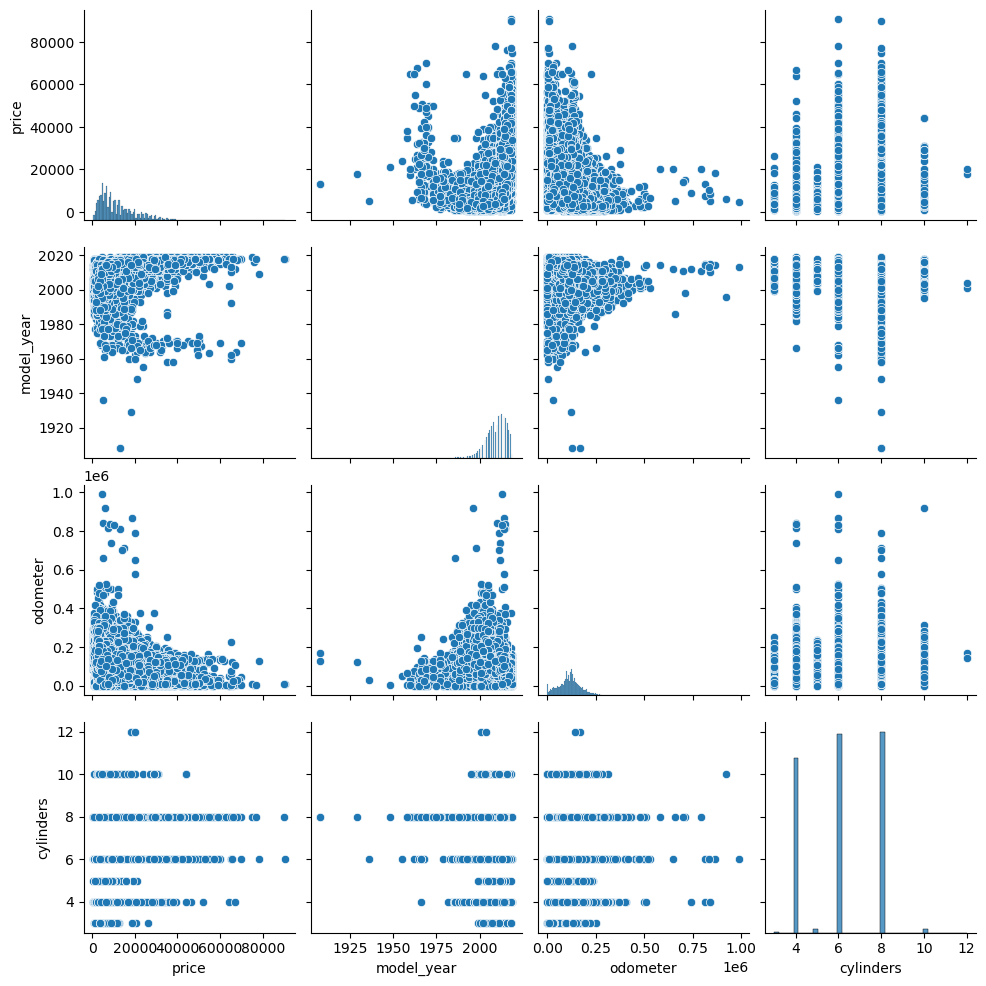

In [29]:
#Previewing some plots
ax = sns.pairplot(
    df[['price', 'model_year', 'odometer','cylinders']])

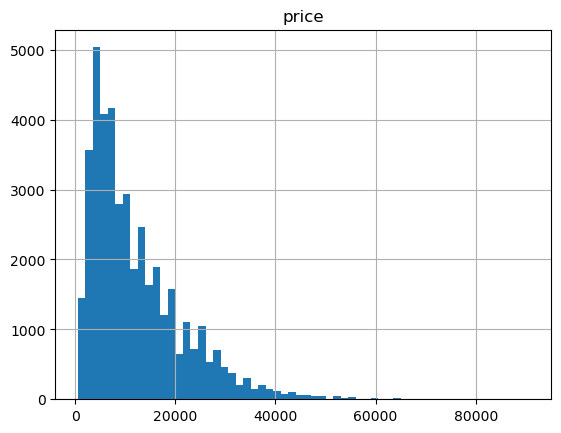

In [30]:
#Checking the price distribution
df.hist(column='price', bins = 60)
plt.show()

After processing the data, we will rename the processed data file as `vehicle_us_processed`, then download it is as CSV file. The file will be used as the new csv file that the app.py file will reference to run the streamlit framework. 

In [31]:
#Downloading the processed data set
df.to_csv("vehicles_us_processed.csv", index=False)

#### Conclusion

We changed the data type to the proper data types. We conducted some common sense data cleaning by removing the prices for cars greater than $1000,000 because the types of vehicles and their mileages does not make sense to be over 100,000 dollars. We also removed vehicles with prices less than 500 dollars because the types of vehicles and mileages in this range did not make sense to be less than 500 dollars. We previewed some plots to have an idea what types of plots we could create on the web app.

### Web Appliction

To build the web application we will use the Streamlit framework. We will create the codes here first and run them to make sure it works properly. After that, we will transfer the codes to the app.py file.


In [32]:
#Creating header with an option to filter the data and the checkbox:
#dataset includes mainly used cars, but there are several new options as well
#let users decide whether they want to see new cars from dealers or not) 

st.header('Market of used cars. Original data')
st.write("""
##### Filter the data below to see the ads by manufacturer
""")
show_new_cars = st.checkbox('Include new cars from dealers')

2023-01-18 18:27:38.536 
  command:

    streamlit run c:\Users\Keke\anaconda3\envs\streamlit_proj\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [33]:
show_new_cars

False

In [34]:
if not show_new_cars:
    df = df[df.state!='new']

In [35]:
#creating options for filter  from all manufacturers and different years
manufacturer_choice = df['manufacturer'].unique()
make_choice_man = st.selectbox('Select manufacturer:', manufacturer_choice)

In [36]:
make_choice_man

'bmw'

In [37]:
#next let's create a slider for years, so that users can filter cars by years of produciton
#creating min and max years as limits for sliders
min_year, max_year=int(df['model_year'].min()), int(df['model_year'].max())

#creating slider 
year_range = st.slider(
     "Choose years",
     value=(min_year,max_year),min_value=min_year,max_value=max_year )

In [38]:
year_range

(1908, 2019)

In [39]:
#creating actual range  based on slider that will be used to filter in the dataset
actual_range=list(range(year_range[0],year_range[1]+1))

In [40]:
#filtering dataset on chosen manufacturer and chosen year range
filtered_type=df[(df.manufacturer==make_choice_man) & (df.model_year.isin(list(actual_range)))]

#showing the final table in streamlit
st.table(filtered_type)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [41]:
st.header('Price analysis')
st.write("""
###### Let's analyze what influences price the most. We will check how distibution of price varies depending on 
transmission, engine or body type and state
""")

import plotly.express as px

# Will create histograms with the split by parameter of choice: color, transmission, fuel, type, state

#creating list of options to choose from
list_for_hist=['transmission','fuel','type','state']

#creating selectbox
choice_for_hist = st.selectbox('Split for price distribution', list_for_hist)

#plotly histogram, where price is split by the choice made in the selectbox
fig1 = px.histogram(df, x="price", color=choice_for_hist)

#adding title
fig1.update_layout(
title="<b> Split of price by {}</b>".format(choice_for_hist))

#embedding into streamlit
st.plotly_chart(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [42]:
fig1.show()

In [43]:
#distribution of vehicle types by the manufacturer 
st.header('Vehicle types by manufacturer')
# create a plotly barchart figure
fig = px.bar(df, x='manufacturer', color='type')
# display the figure with streamlit
st.write(fig)

#embedding into streamlit
st.plotly_chart(fig)

fig.show()

In [44]:
#Relationship between condition and model_year:
st.header('Histogram of `condition` vs `model_year`')
fig = px.histogram(df, x='model_year', color='condition')
st.write(fig)

#embedding into streamlit
st.plotly_chart(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [45]:
fig.show()

In [46]:
# creating age category of cars, cause we want to take it into account when we analyze the price
df['age']=2023-df['model_year']

def age_category(x):
    if x<5: return '<5'
    elif x>=5 and x<10: return '5-10'
    elif x>=10 and x<20: return '10-20'
    else: return '>20'

df['age_category']=  df['age'].apply(age_category)

In [47]:
st.write("""
###### Now let's check how price is affected by odometer, engine capacity or number of photos in the adds
""")

#Distribution of price depending on odometer_value,engine_capacity,number_of_photos
#with the split by age category
list_for_scatter=['odometer','fuel']
choice_for_scatter = st.selectbox('Price dependency on ', list_for_scatter)
fig2 = px.scatter(df, x="price", y=choice_for_scatter,hover_data=['model_year'])

fig2.update_layout(
title="<b> Price vs {}</b>".format(choice_for_scatter))
st.plotly_chart(fig2)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [48]:
fig2

In [49]:
# Price distribution of manufacturers
st.header('Compare price distribution between manufacturers')
# get a list of car manufacturers
manufac_list = sorted(df['manufacturer'].unique())
# get user's inputs from a dropdown menu
manufacturer_1 = st.selectbox(
                              label='Select manufacturer 1', # title of the select box
                              options=manufac_list, # options listed in the select box
                              index=manufac_list.index('chevrolet') # default pre-selected option
                              )
# repeat for the second dropdown menu
manufacturer_2 = st.selectbox(
                              label='Select manufacturer 2',
                              options=manufac_list, 
                              index=manufac_list.index('hyundai')
                              )
# filter the dataframe 
mask_filter = (df['manufacturer'] == manufacturer_1) | (df['manufacturer'] == manufacturer_2)
df_filtered = df[mask_filter]

# add a checkbox if a user wants to normalize the histogram
normalize = st.checkbox('Normalize histogram', value=True)
if normalize:
    histnorm = 'percent'
else:
    histnorm = None

# create a plotly histogram figure
fig = px.histogram(df_filtered,
                      x='price',
                      nbins=30,
                      color='manufacturer',
                      histnorm=histnorm,
                      barmode='overlay')
# display the figure with streamlit
st.write(fig)
fig

In [50]:
# Create a scatter plot of 'odometer' vs 'price' with 'manufacturer' as the color
fig = px.scatter(df, x='model_year', y='price', color='manufacturer')
fig.show()

### Conclusion

The initial part of building the web application is complete. We preprocessed the data, cleaned the data, and writing the codes needed to build the web app. Next, we will refine the streamlit code into the app.py file and continue the next of the stages on `vscode`